In [1]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('R/data.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data.set_index('date', inplace=True)

time_series = data['consumtion']

best_model = auto_arima(time_series, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2727.316, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2829.719, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2739.293, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2773.990, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2827.751, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2758.006, Time=1.11 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2745.328, Time=1.20 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2733.374, Time=3.66 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2733.925, Time=3.36 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.31 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2733.547, Time=4.44 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2734.514, Time=5.29 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2717.317, Time=1.49 sec
 ARIMA(1,1,2)(0,0,1)[12] inte

In [55]:
num_predictions = 32

forecast = best_model.predict(n_periods=num_predictions)
forecast = forecast * 1.05

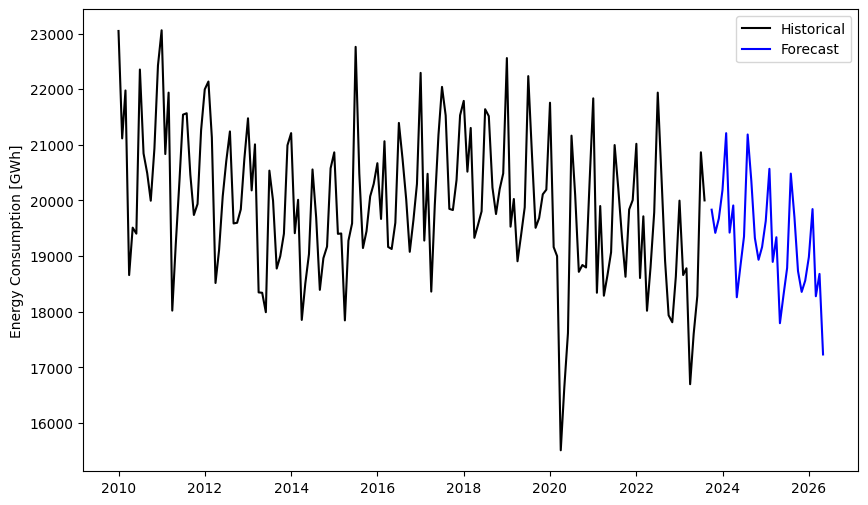

In [56]:
plt.figure(figsize=(10, 6))

plt.plot(time_series.index, time_series, label='Historical', color='black')

forecast_index = pd.date_range(start=time_series.index[-1], periods=num_predictions + 1, freq='M')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='blue')

# plt.xlabel('Date')
plt.ylabel('Energy Consumption [GWh]')
# plt.title('')
plt.legend()
plt.show()